# Exploración de datos cruce TCGA-METHBANK

## Importar librerías y definir paths

In [3]:
import sys
from pathlib import Path

src_path = str(Path.cwd().parents[0] / "src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
from eda_utils import violin_plot

data_preprocessed_path = str(Path.cwd().parents[0] / "data"/ "preprocessed")
data_raw_path = str(Path.cwd().parents[0] / "data" / "raw")

## Lectura

In [5]:
df = pd.read_csv(f"{data_preprocessed_path}/gdc_methbank.csv")
df.head()

,cg02004156,cg04037732,cg04344997,cg04702045,cg04765675,cg05935584,cg06700462,cg06791102,cg06899582,cg08798116,...,cg27158143,cg27187881,cg27281093,cg27324619,cg27378424,cg27416437,cg27532722,cg27553637,cg27611781,sample_type
0,0.312,0.336,0.493,0.372,0.051,0.586,0.385,0.521,0.192,0.462,...,0.104,0.092,0.112,0.278,0.048,0.075,0.428,0.052,0.143,Solid Tissue Normal
1,0.427,0.410,0.484,0.372,0.044,0.538,0.340,0.529,0.252,0.452,...,0.092,0.135,0.081,0.342,0.042,0.069,0.504,0.073,0.137,Solid Tissue Normal
2,0.384,0.446,0.524,0.318,0.045,0.508,0.335,0.467,0.205,0.421,...,0.091,0.072,0.171,0.417,0.048,0.056,0.576,0.057,0.146,Solid Tissue Normal
3,0.381,0.485,0.438,0.210,0.047,0.655,0.383,0.515,0.154,0.399,...,0.121,0.058,0.087,0.243,0.042,0.048,0.599,0.050,0.154,Solid Tissue Normal
4,0.322,0.365,0.352,0.304,0.038,0.456,0.322,0.390,0.188,0.433,...,0.055,0.092,0.095,0.292,0.052,0.080,0.501,0.052,0.088,Solid Tissue Normal


## Análisis de distribuciones

In [6]:
print("Conteo de tipos de muestra")
print(Counter(df['sample_type']))

Conteo de tipos de muestra
Counter({'Solid Tissue Normal': 490, 'Primary Tumor': 314})


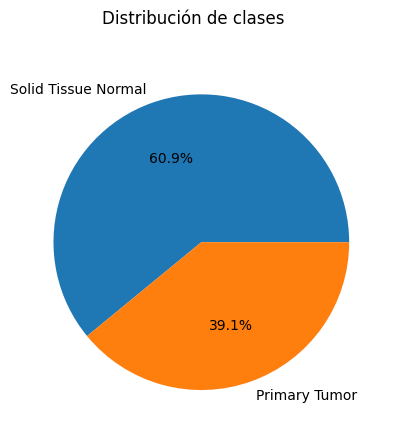

In [7]:
# Análizamos distribución
count = Counter(df['sample_type'])
fig, ax = plt.subplots()
fig.suptitle('Distribución de clases')
ax = ax.pie(count.values(), labels=count.keys(), autopct='%1.1f%%')

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
x, y = df.drop(columns = ['sample_type']), df['sample_type']

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

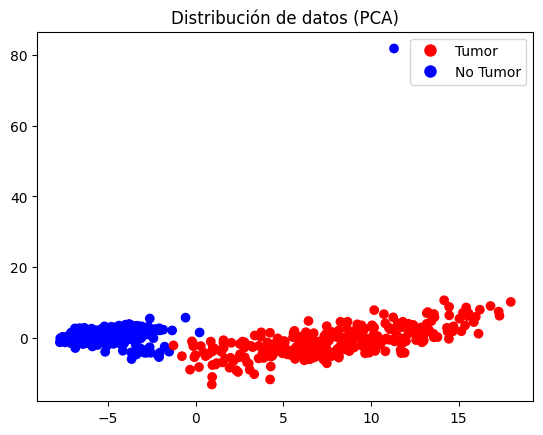

In [10]:
from matplotlib.lines import Line2D

plt.scatter(x_pca[:,0], x_pca[:,1], c =df['sample_type'].replace({'Solid Tissue Normal':'blue', 'Primary Tumor':'red'}) )

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Tumor',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='No Tumor',
                          markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Distribución de datos (PCA)')
plt.show()

## Correlaciones

In [11]:
df['tumor'] = df['sample_type'].replace({'Solid Tissue Normal':0, 'Primary Tumor':1 })

In [12]:
cpg_corr = df.corrwith(df['tumor'], numeric_only=True).abs().sort_values(ascending=False)
top_10_cpg = cpg_corr[1:11]
bottom_10_cpg = cpg_corr[-10:]

In [13]:
top_10_cpg

cg15660077    0.939083
cg01169778    0.936637
cg26687173    0.930723
cg16779976    0.922536
cg15958424    0.920813
cg18902203    0.916295
cg20070090    0.914290
cg10667970    0.912983
cg15796819    0.912250
cg13641903    0.912122
dtype: float64

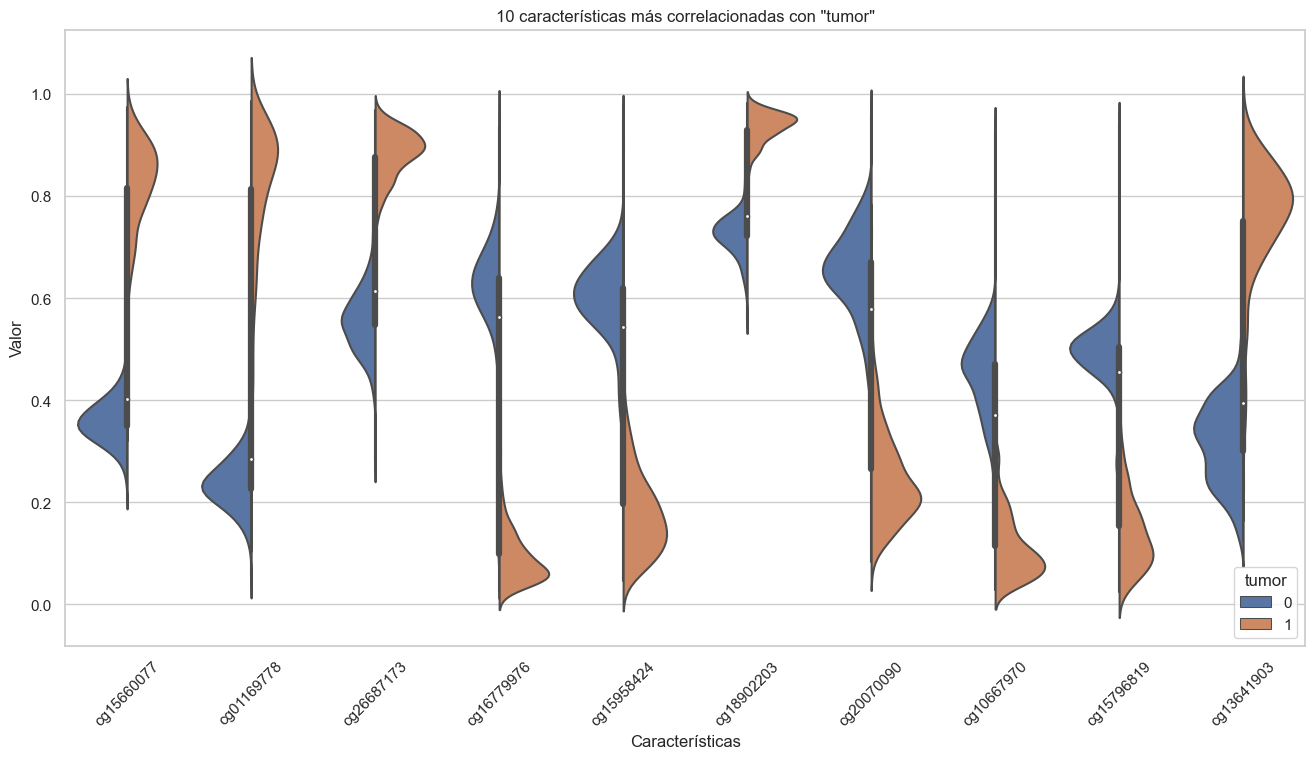

In [14]:
plot_data = df[top_10_cpg.index.tolist() + ['tumor']]
data_melted = plot_data.melt(id_vars='tumor', var_name='Feature', value_name='Value')
violin_plot(data_melted, 'Feature', 'Value', 'tumor', '10 características más correlacionadas con "tumor"')

In [15]:
bottom_10_cpg

cg23545272    0.000273
cg22395019    0.000253
cg22418360    0.000170
cg12398397    0.000131
cg08452348    0.000126
cg24376537    0.000116
cg12706983    0.000090
cg24574111    0.000069
cg24698622    0.000059
cg04741821    0.000033
dtype: float64

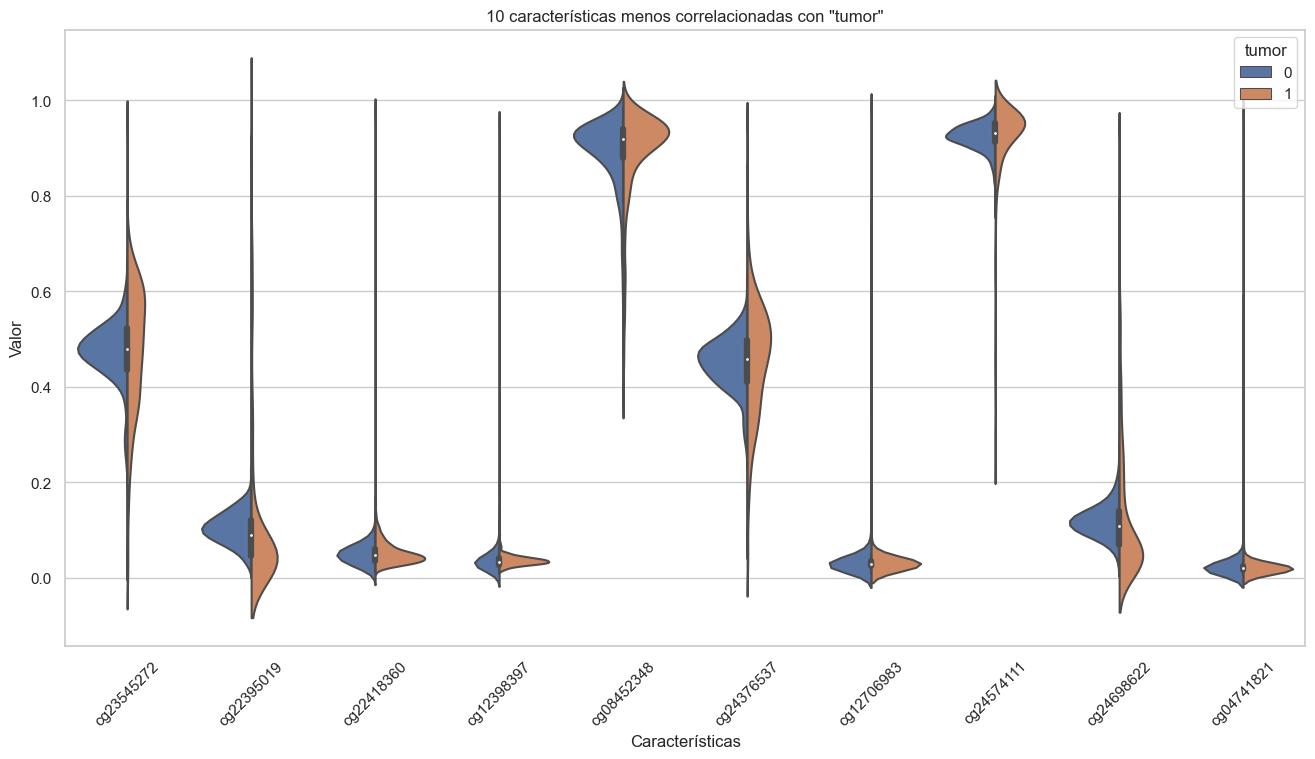

In [16]:
plot_data = df[bottom_10_cpg.index.tolist() + ['tumor']]
data_melted = plot_data.melt(id_vars='tumor', var_name='Feature', value_name='Value')
violin_plot(data_melted, 'Feature', 'Value', 'tumor', '10 características menos correlacionadas con "tumor"')